In [1]:
import numpy as np
import pandas as pd
import string

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3345,ham,U're welcome... Caught u using broken english ...,NaN,NaN,NaN
1955,ham,"Aight I'll grab something to eat too, text me ...",NaN,NaN,NaN
3085,ham,I wish that I was with you. Holding you tightl...,NaN,NaN,NaN
3724,ham,Nothing spl..wat abt u and whr ru?,NaN,NaN,NaN
4346,spam,U 447801259231 have a secret admirer who is lo...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### Steps
1) Data cleaning as there are many NaN values
2) Exploratory Data Analysis (EDA)
3) Text Preprocessing (Vectorization,removing stop words)
4) Model Building
5) Evaluation of model
6) Improvement depending on evaluation
7) Website
8) Deployment over Heroku

## 1. DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#Here, we can see that column 2,3,4 has very less non-null values. so we drop these columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
5060,ham,"Sorry, I'll call you later. I am in meeting sir."
4777,ham,U R THE MOST BEAUTIFUL GIRL IVE EVER SEEN. U R...
870,ham,"Well am officially in a philosophical hole, so..."
1995,ham,Shall i come to get pickle
751,spam,You have an important customer service announc...


In [8]:
# Renaming the columns using dictionary

df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.sample(5)

,target,text
3222,ham,Well that must be a pain to catch
4103,ham,Do u hav any frnd by name ashwini in ur college?
4747,ham,The beauty of life is in next second.. which h...
4957,ham,Why didn't u call on your lunch?
5061,ham,Havent stuck at orchard in my dad's car. Going...


In [10]:
# lAbelling ham and spam field in target column as numbers using label encoder. ham-->0 and spam--->1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()  #shows no duplicate value now

0

In [17]:
df.shape

(5169, 2)

## 2. EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

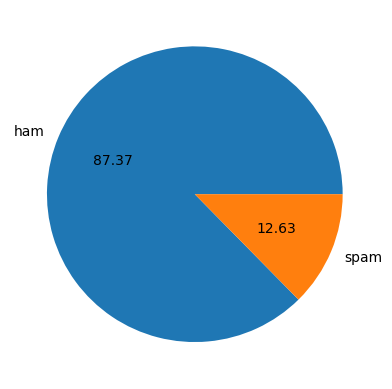

In [20]:
#viewing the target to know if balanced or not
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()    #this is used to that extra piece of code wont come when only upper code is run

In [21]:
# We can clearly see that data is imbalanced
# For deeper analysis, we will try to find out the number of characters, words and sentences in the sms.
#So, we will make 3 columns using NLP library nltk.

import nltk

In [22]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords   #for stopwords

In [24]:
from nltk.stem.porter import PorterStemmer     #for stemming and creating stemmer obj ps
ps=PorterStemmer()

In [25]:
# finding number of characters used in text column using pandas
df['num_characters']=df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# to count number of words, we require nltk 
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# "0" indicates that this is for "ham" messages. we are using describe on the below 3 columns of only ham messages to see the
#pattern of those messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# for spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
#clearly, we can see that spam messages are a bit longer than ham messages. lets see them by plotting too.
import seaborn as sns

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

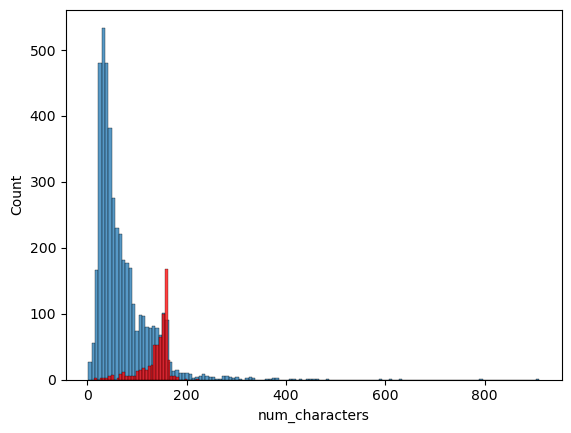

In [35]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

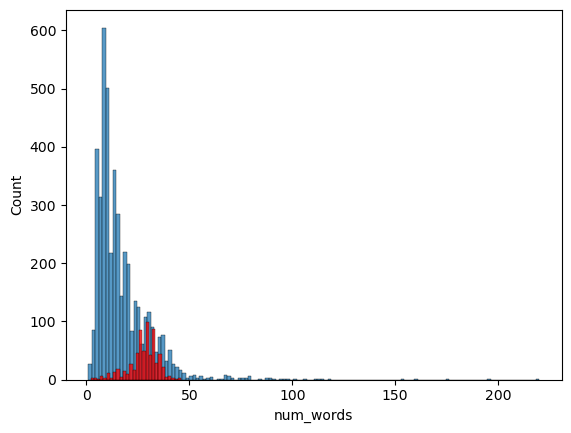

In [36]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


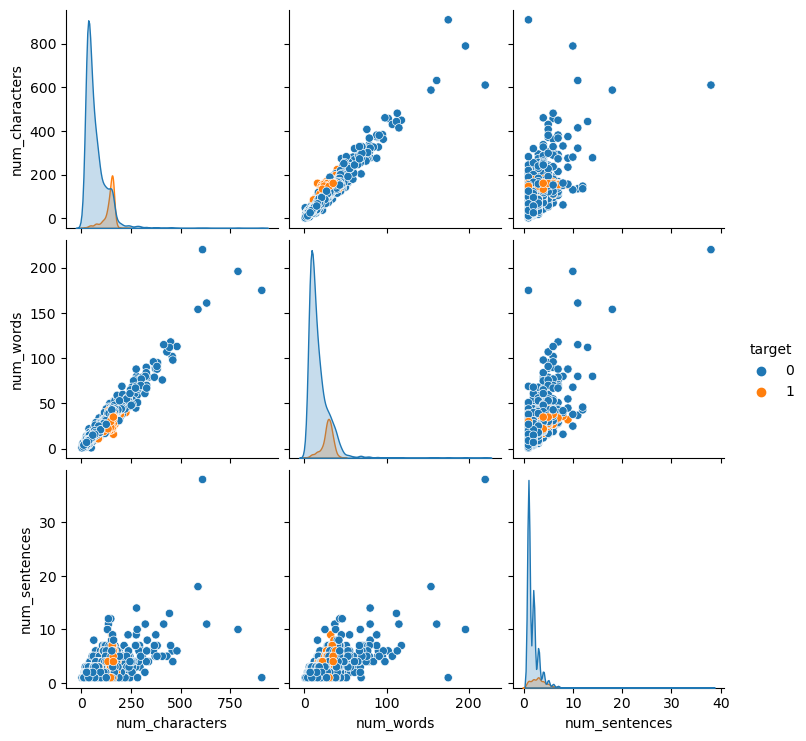

In [37]:
sns.pairplot(df,hue='target')

## 3. Text/Data Preprocessing
Steps
1) Lower case
2) Tokenization
3) Removing special characters
4) Removing stop words and punctuation
5) Stemming

In [38]:

def transform_text(text):
    text=text.lower()    #converting the text into lowercase
    text=nltk.word_tokenize(text)    #using nltk for tokenization and gives each word of the text in the form of list
    # As the text is now converted in the form of list,now we will run the loop and then alphanumeric only taken
    y=[]    #initialize empty list
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
            y.append(ps.stem(i))
    
    
    return " ".join(y)

In [39]:
transform_text("Hello, this is sudip Paudel loving all the incoming")   #fn call

'hello sudip paudel love incom'

In [40]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [41]:
df['transformed_text']=df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
# creating wordcloud of hams and spam
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

<Figure size 1500x600 with 0 Axes>

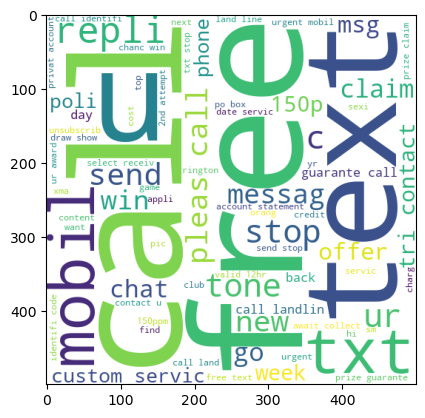

<Figure size 1500x600 with 0 Axes>

In [45]:
plt.imshow(spam_wc)
plt.figure(figsize=(15,6))

In [46]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

<Figure size 1500x600 with 0 Axes>

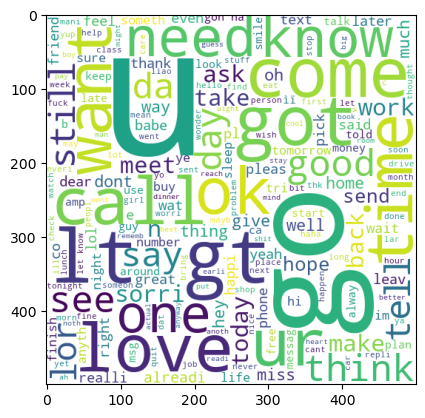

<Figure size 1500x600 with 0 Axes>

In [47]:
plt.imshow(ham_wc)
plt.figure(figsize=(15,6))

In [48]:
#lets look into top 30 words in both categories
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():   #converted to list
    for word in msg.split():
        spam_corpus.append(word)


In [50]:
len(spam_corpus)

9939

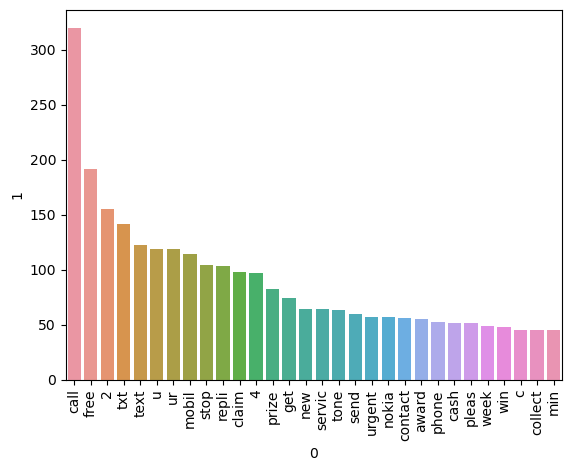

In [51]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])  #creates a dictionary having information of the words that came in corpus and later add into dataframe)
plt.xticks(rotation='vertical')
plt.show()

In [52]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():   #converted to list
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

35404

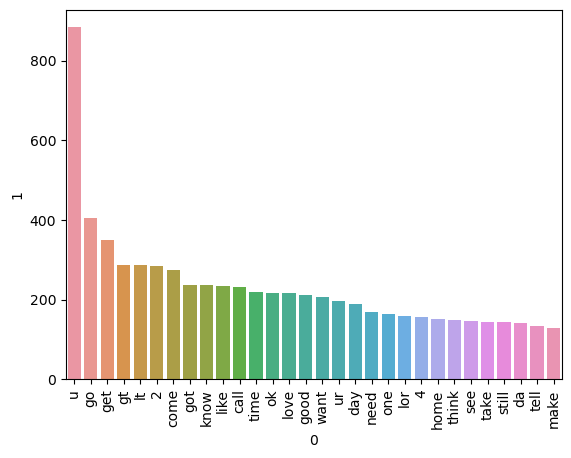

In [54]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])  #creates a dictionary having information of the words that came in corpus and later add into dataframe)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 3. Building the model (Using Naive Bayes)

In textual data, naive bayes algorithm gives the best result so we are using this model. Also, we will see for other algorithms to find the best suiting algorith according to accuracy.\

==> In any algorithm, we give inputs in numbers. Here, out input is transformed_text which is in text. So, we need to convert it in numeric form i.e. we need to vectorize the text.

2 ways for vectorization
a) Bag of words--> freq word ko col banauney
b) TFIDF
c) Word to vec

In [236]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=2000)

In [237]:
X=tfidf.fit_transform(df['transformed_text']).toarray()    #gives sparse array


In [238]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [239]:
X.shape

(5169, 2000)

In [240]:
y=df['target'].values

In [241]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [244]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [245]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [246]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.851063829787234
[[765 131]
 [ 23 115]]
0.46747967479674796


In [247]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [248]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9864603481624759
[[895   1]
 [ 13 125]]
0.9920634920634921


In [217]:
# since data is imbalanced, so precision is more important. so we will go with multinomial naive bayes (MNB) using tfidf.
#Also,lets check for other algorithms

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [219]:
svc=SVC(kernel='sigmoid', gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)

In [220]:
# creating a dictionary having algorithm names as keys and  their objects as values
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [221]:
#creating fn "train_classifier" in which we are passing classifier, training and testing data
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

#here, Y_pred has list of predictions for X_test

In [222]:
#calling the function
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9669421487603306)

In [223]:
# now, I am looping over above dictionary clfs, and catch one algorithm at a time, trained the model and store the accuracy and 
#precision score for every algorithm. And, then convert that accuracy and precision for each algorithm into dataframe

accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy- ",current_accuracy)
    print("Precision- ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy-  0.9758220502901354
Precision-  0.9669421487603306
For  KN
Accuracy-  0.9081237911025145
Precision-  1.0
For  NB
Accuracy-  0.97678916827853
Precision-  1.0
For  DT
Accuracy-  0.9342359767891683
Precision-  0.8365384615384616
For  LR
Accuracy-  0.9574468085106383
Precision-  0.9607843137254902
For  RF
Accuracy-  0.9748549323017408
Precision-  0.9666666666666667
For  AdaBoost
Accuracy-  0.9613152804642167
Precision-  0.9537037037037037
For  BgC
Accuracy-  0.9564796905222437
Precision-  0.849624060150376
For  ETC
Accuracy-  0.9777562862669246
Precision-  0.9752066115702479
For  GBDT
Accuracy-  0.9526112185686654
Precision-  0.9320388349514563
For  xgb
Accuracy-  0.9729206963249516
Precision-  0.9508196721311475


In [202]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [203]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [77]:
#lets try to improve our model so that accuracy is also improved
#TO DO:
#    1) tfidf vectorizer import garda hidden parameter huncha max_features vanni tesma add garni import garda
#     2) Scale garna sakinxa data lai (khasai improve vayena so not merged)
#     3) Voting classifier (best performing algorithm haru bata ni best nikalne)

In [224]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_maxft_2000':accuracy_scores,'Precision_maxft_2000':precision_scores}).sort_values('Precision_maxft_2000',ascending=False)

In [225]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [226]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_maxft_2000,Precision_maxft_2000
0,KN,0.900387,1.000000,0.908124,1.000000
1,NB,0.959381,1.000000,0.976789,1.000000
2,RF,0.971954,1.000000,0.974855,0.966667
3,ETC,0.972921,0.982456,0.977756,0.975207
4,SVC,0.972921,0.974138,0.975822,0.966942
5,AdaBoost,0.961315,0.945455,0.961315,0.953704
6,xgb,0.972921,0.943548,0.972921,0.950820
7,LR,0.951644,0.940000,0.957447,0.960784
8,GBDT,0.952611,0.923810,0.952611,0.932039
9,BgC,0.958414,0.862595,0.956480,0.849624


In [227]:
#voting classifier
mnb=MultinomialNB()
svc= SVC(kernel='sigmoid',gamma=1.0,probability=True)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [228]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [229]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [231]:
y_pred=voting.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))

Accuracy: 0.9796905222437138
Precision: 0.9834710743801653


In [232]:
#after voting classifier, our precision has declined further. so of no use
# lets do stacking now in which weightage of algorithm can be given
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [233]:
from sklearn.ensemble import StackingClassifier

In [234]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [235]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))

Accuracy: 0.9806576402321083
Precision: 0.9538461538461539


In [250]:
# we can see that the best performing algorithm so far is multinomial naive bayes. So, we will use it.

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))